# Root Finding

Suppose that you want to find the solution(s) of a transcendental equation. For example, you might want to know what values of $x$ that solve the equation
$$ \sin x = 2x\cos x.$$ 
The graphical approach is to plot both sides of the equation and see where they cross as shown below.

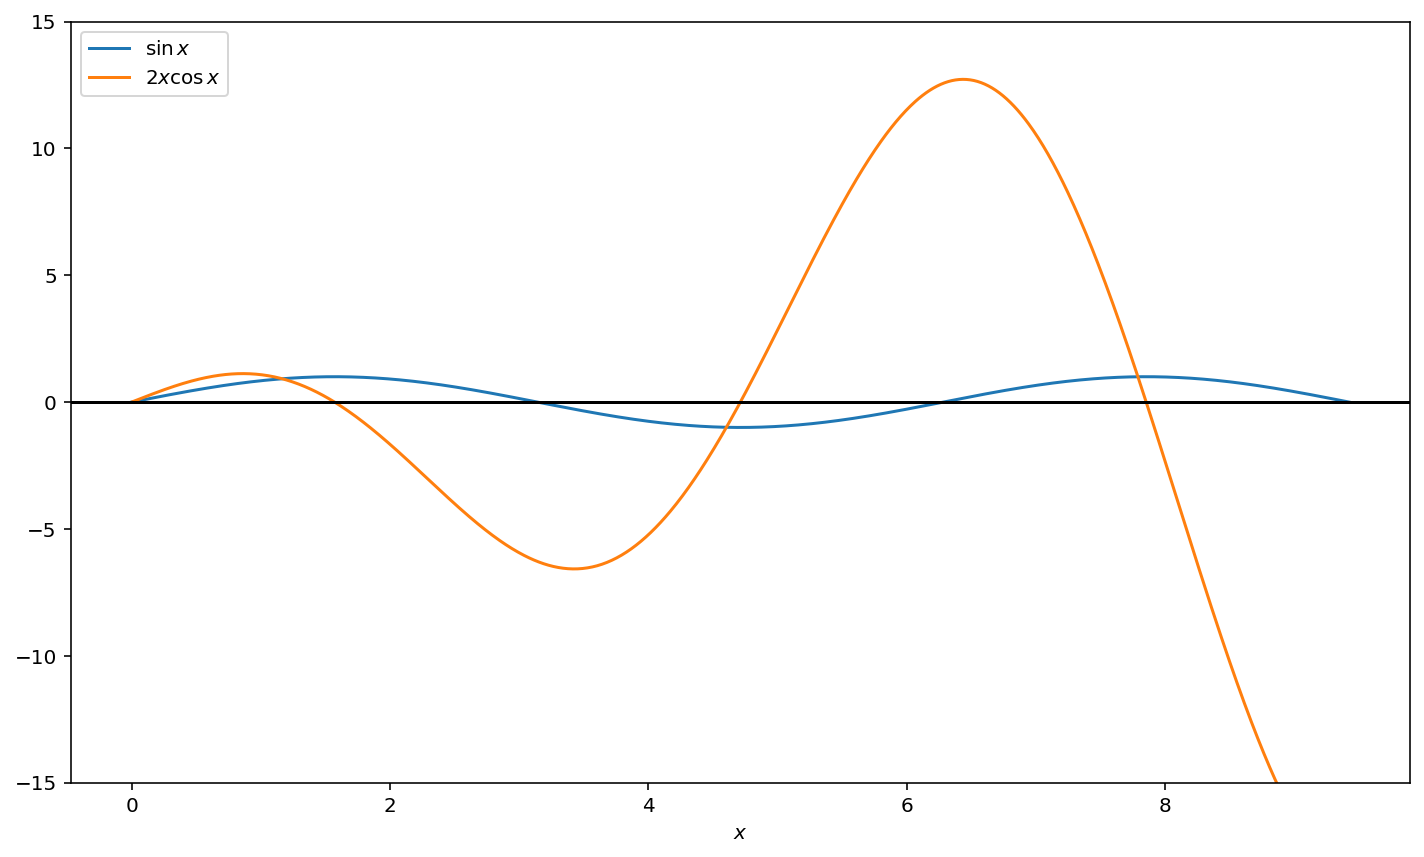

In [3]:
import pylab as pl 

x = pl.linspace(0,3*pl.pi,1000)
yL = pl.sin(x)
yR = 2*x*pl.cos(x)

pl.figure()
pl.plot(x,yL,label=r'$\sin x$')
pl.plot(x,yR,label=r'$2x\cos x$')
pl.legend(loc='upper left')
pl.ylim(-15,15)
pl.xlabel(r'$x$')
pl.axhline(y=0, c="k") # draw horizontal line at y=0
pl.show()

From the graph above, it is possible to find approximate solutions. There is a solution at $x=0$. You can also see that there are solutions between $n\pi$ and $(n+1)\pi$ for integer values of $n$.  
Another way to find the solution graphically is to plot the difference of the two sides of the original equation. If we define the function
$$f(x) = \sin x - 2x\cos x,$$ 
then the original equation has a solution where $f(x)=0$. These are known as the roots of $f(x)$. It is slightly easier to find the solutions by looking at a graph of this funciton as shown below.

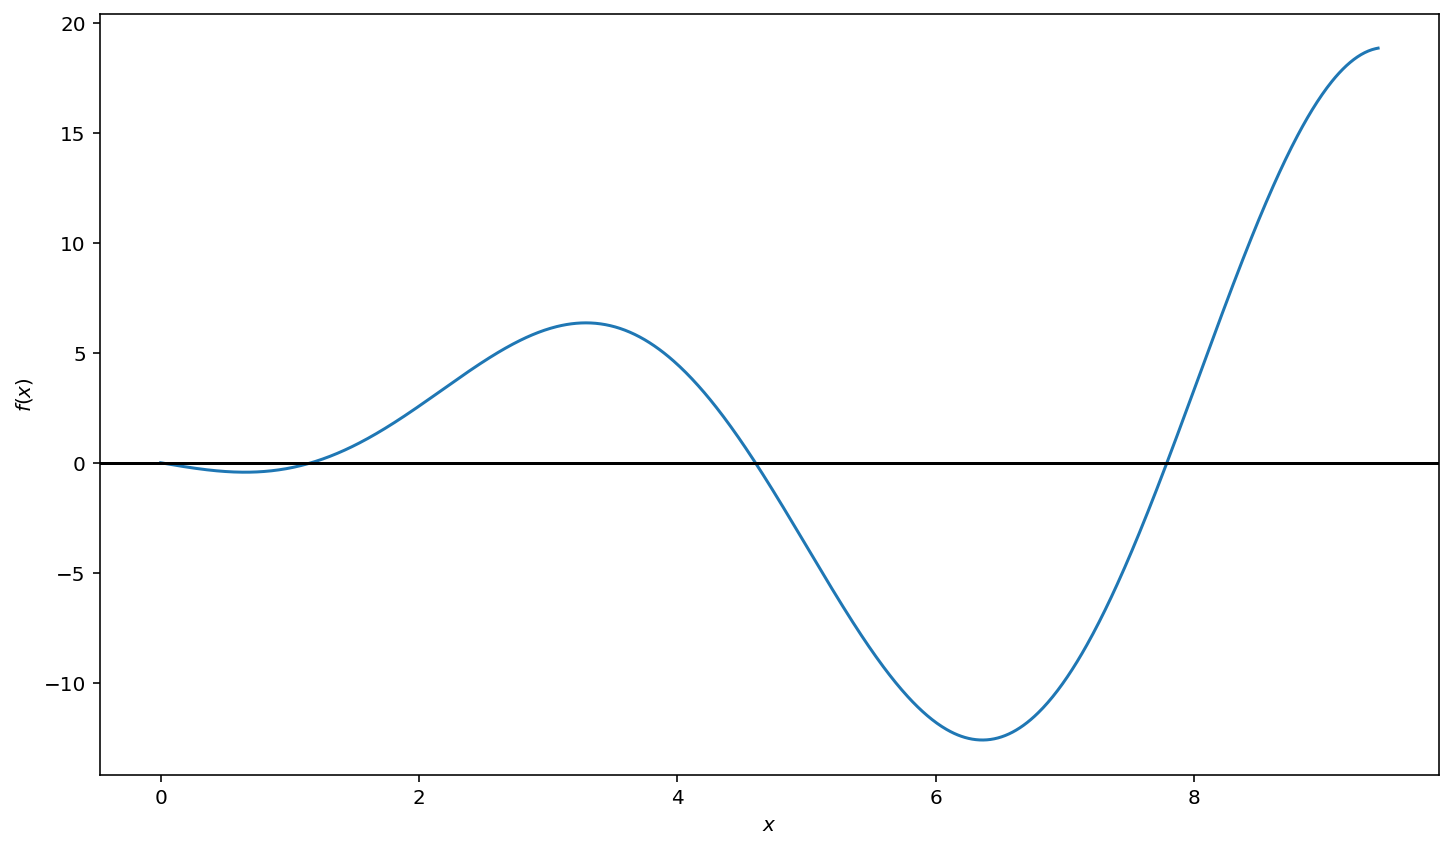

In [4]:
import pylab as pl 

x = pl.linspace(0,3*pl.pi,1000)
fx = pl.sin(x) - 2*x*pl.cos(x)

pl.figure()
pl.plot(x,fx)
pl.xlabel(r'$x$')
pl.ylabel(r'$f(x)$')
pl.axhline(y=0, c="k") # draw horizontal line at y=0
pl.show()

There are several functions in the **scipy.optimize** library for finding the roots of a function. For all of the methods, you must define the function whose roots you want to find. In general, you must know the approximate location of the root.  
  
First, you can use the **optimize.brentq** function if you know values that bracket the root. As mentioned above, the roots of the example function $f(x)$ are between $n\pi$ and $(n+1)\pi$ for integer values of $n$.

In [5]:
import scipy.optimize as opt
import pylab as pl 

# Define the function
def f(x):
    return pl.sin(x) - 2*x*pl.cos(x)

# The function has roots between 0, pi, 2*pi, etc.
for n in pl.arange(10):
    print(opt.brentq(f, n*pl.pi, (n+1)*pl.pi))

0.0
4.604216777200577
7.789883751144127
10.949943648541158
14.101725133565873
17.249781834607894
20.395842357309167
23.540708292304693
26.684802490925243
29.828369213095566


Notice that for the range 0 to $\pi$, the function found the root $x=0$, so it stopped searching and missed the root near $x=1$. The other root can be found by changing the lower limit of the range slightly as shown below. This is an example of why it is important to check that the results match with a graph of the function.

In [6]:
print(opt.brentq(f,0.1,pl.pi))

1.1655611852072658


The function $f(x)$ must have opposite signs at the two limits given or the the root-finding function will fail as shown below.

In [7]:
print(opt.brentq(f,4,8))

ValueError: f(a) and f(b) must have different signs

Second, you can use the **optimize.fsolve** function if you know approximate values of the roots. In the example below, initial guesses of $x\approx (n+\frac{1}{2})\pi$ for integers $n$ from 0 to 9 are used. This guesses a point in the middle of each range of $n\pi$ to $(n+1)\pi$ 

In [8]:
n = pl.arange(10)  # make a list of integers from 0 to 9 
guesses = (n+0.5)*pl.pi  # make a list of guesses
print(opt.fsolve(f,guesses))

[ 1.16556119  4.60421678  7.78988375 10.94994365 14.10172513 17.24978183
 20.39584236 23.54070829 26.68480249 29.82836921]


Note that this doesn't find the root $x=0$.

## Additional Documentation

More information is available at  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html